In [54]:
from pathlib import Path
import pandas as pd

file_address = "../../Data/CrisisLogger/crisislogger.csv"
file_name = Path(file_address)
if file_name.exists():
    print("Reading file {}.".format(file_address))
    df = pd.read_csv(file_address)
    print(df.head())
else: 
    print("file {} does not exists.".format(file_address))

Reading file ../../Data/CrisisLogger/crisislogger.csv.
   upload_id                                     transcriptions
0         10  so high our experience so far has been a littl...
1        209  I'm not going to stay in my name for the anony...
2        216  so far I have been florentines now for about a...
3        222  it has actually been a very difficult. Trying ...
4        228  so this whole situation has been strange for u...


In [55]:
def clean_data(df):
    df = df.dropna().reset_index(drop=True)
    
clean_data(df)

<AxesSubplot:title={'center':'Comments Polarity'}, ylabel='Frequency'>

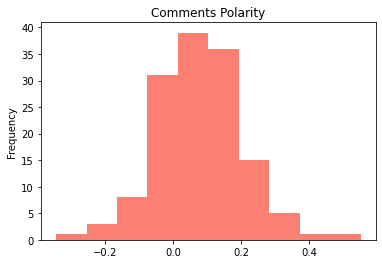

In [56]:
from textblob import TextBlob

df['polarity'] = df['transcriptions'].apply(lambda x: TextBlob(x).polarity)

#Plot
df['polarity'].plot.hist(color='salmon', title='Comments Polarity')

<AxesSubplot:title={'center':'Comments subjective'}, ylabel='Frequency'>

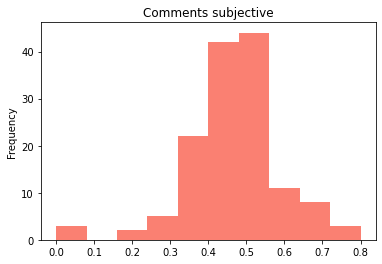

In [57]:
df['subjective'] = df['transcriptions'].apply(lambda x: TextBlob(x).subjectivity)

#Plot
df['subjective'].plot.hist(color='salmon', title='Comments subjective')


In [58]:
import re, string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob

def make_stop_words():
    return stopwords.words('english')

stop_words = make_stop_words()

In [59]:

def clean_text(text):
    text = text.lower()
    text = re.sub('@', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"[^a-zA-Z ]+", "", text)
    
    #Tokenize the data
    text = nltk.word_tokenize(text)
    #Remove stopwords
    text = [w for w in text if w not in stop_words]
    
    return text
    

In [60]:
df['words'] = df['transcriptions'].apply(lambda x: clean_text(x))
print(df.head(1))


   upload_id                                     transcriptions  polarity  \
0         10  so high our experience so far has been a littl...  0.053302   

   subjective                                              words  
0    0.533933  [high, experience, far, little, bit, difficult...  


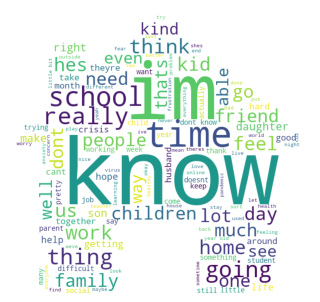

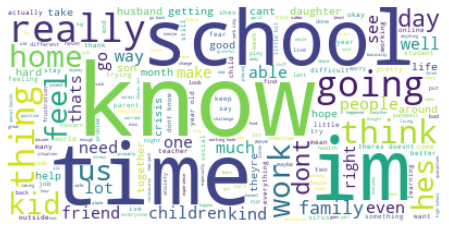

In [61]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests


comment_words = ''
count = 0
stopwords = set(STOPWORDS)
for val in df['words']: 
    comment_words += " ".join(val)+" "

pic = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png',stream=True).raw))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, mask = pic, 
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (10, 4), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# Second method to show the wordcloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(comment_words)
plt.figure(figsize = (10, 4), facecolor = 'white', edgecolor='blue') 

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


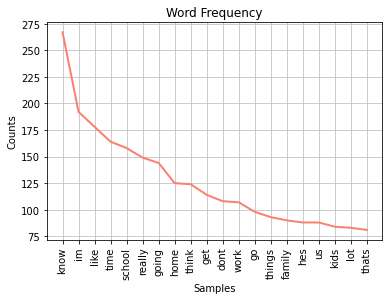

In [62]:
#From lists of comments to a single list containing all words      
all_words=[]        
for i in range(len(df)):
    all_words = all_words + df['words'][i]
#Get word frequency
nlp_words = nltk.FreqDist(all_words)
plot1 = nlp_words.plot(20, color='salmon', title='Word Frequency')

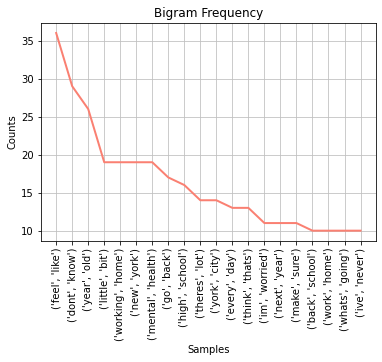

<AxesSubplot:title={'center':'Bigram Frequency'}, xlabel='Samples', ylabel='Counts'>

In [63]:
#Bigrams
bigrm = list(nltk.bigrams(all_words))
words_2 = nltk.FreqDist(bigrm)
words_2.plot(20, color='salmon', title='Bigram Frequency')

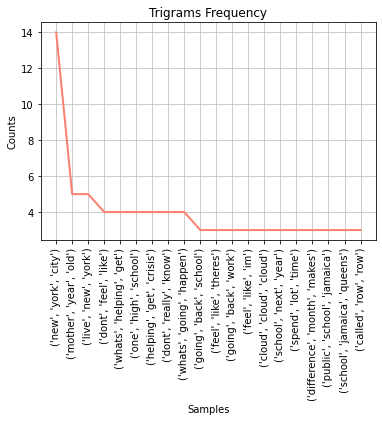

<AxesSubplot:title={'center':'Trigrams Frequency'}, xlabel='Samples', ylabel='Counts'>

In [64]:
#trigrams
trigrams = list(nltk.trigrams(all_words))
words_3 = nltk.FreqDist(trigrams)
words_3.plot(20, color='salmon', title='Trigrams Frequency')

In [65]:
# Topic Modeling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import make_pipeline

tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, ngram_range=(3,4))
lda = LatentDirichletAllocation(n_components=4)
pipe = make_pipeline(tfidf_vectorizer, lda)
pipe.fit(df['transcriptions'])
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
print_top_words(lda, tfidf_vectorizer.get_feature_names(), n_top_words=5)


Topic #0: seen time miss friends, equipped support lack social, effects seen time, seen time miss, interaction incredibly stressful
Topic #1: cloud cloud cloud, harold harold harold, cloud cloud cloud cloud, bit difficult home, difficult home child know
Topic #2: lonely worried disconnected, advantages come coronavirus napping, advantages come coronavirus, coronavirus napping school, come coronavirus napping
Topic #3: might compel work covet, worried boss might compel, worried boss might, boss might compel, might compel work

